**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment12 - Polynomial fit with a regularization***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment12)

# Setting Up

Now we got 1001 sample data. We define a function that is our answer(clean data). 

This function is a function that can not be expressed as a polynomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

p_start = 6
p_end = 15
p_num = 10

# Clean and Noisy Data

```y1``` is clean data with x is -10 to 10 divided into 1001 sections.

```y2``` is noisy data with standard deviation = 5.

Clean data are plotted as **blue dots** and noisy data are plotted as **black dots**.

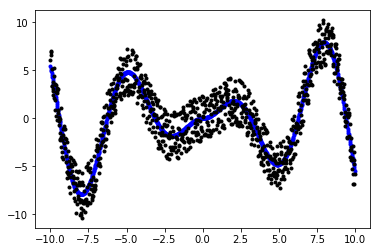

In [2]:
n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

# Define Essential Functions

I define some funtions that is essential to implement polynomial fitting.

```defA(p,x)``` is a function that makes A matrix in varying p=6,7, ... ,15

```getResidual``` automatically calculates the sum of residual with varying p=6,7, ... ,15. 

```resi_x``` and ```resi_y``` is to calculate the residue of the odel.


```withRegularization``` calculates the regularization term of the error equation.

In [3]:
def defA(p,x):
    res = np.zeros((p+1,num))
    for i in range(p):
        res[i+1] = x**(i+1)
    res[0] = 1
    return np.matrix(np.transpose(res))

def appendA(A,p,ratio):
    return np.matrix(np.append(A,np.identity(p)*np.sqrt(ratio),axis=0))

def appendB(B,p):
    return np.matrix(np.append(B,np.zeros((p))))

def getResidual(f_hat,y):
    return sum((f_hat - y)**2)

def withRegularization(ratio,theta):
    return ratio*sum(theta**2)

resi_x = range(p_start,p_start+p_num)
resi_y = np.zeros((p_num))


# Approximation

Since p varies from 0 to 9, variable ```i``` indicates the varying p.

Matrix A and B are defined in every loop and theta is obtained by **pseudo inverse**.

We use matrix multiplication to calculate least square. 

$$ \theta_{0}x_{1}^{0} + \theta_{1}x_{1}^{1} + \cdots + \theta_{p}x_{1}^{p} = y_{1} $$
$$ \theta_{0}x_{2}^{0} + \theta_{1}x_{2}^{1} + \cdots + \theta_{p}x_{2}^{p} = y_{2} $$
$$ \theta_{0}x_{3}^{0} + \theta_{1}x_{3}^{1} + \cdots + \theta_{p}x_{3}^{p} = y_{3} $$
$$ \vdots $$
$$ \theta_{0}x_{n}^{0} + \cdots + \theta_{1}x_{n}^{1} + \theta_{p}x_{n}^{p} = y_{n} $$

We can write this as matmul.
$$ \begin{pmatrix} x_{1}^{0} & \cdots & x_{1}^{p} \\ \vdots &\ddots & \vdots \\ x_{n}^{0} & \cdots & x_{n}^{p} \end{pmatrix} 
\begin{pmatrix} \theta_{0} \\ \vdots \\ \theta_{p} \end{pmatrix} 
= \begin{pmatrix} y_{1} \\ \vdots \\ y_{n}  \end{pmatrix}$$

We can rewrite this as 
$$ A'\theta = B' $$

And we add regularization term
$$ \begin{pmatrix}A'\\\sqrt{\lambda}I \end{pmatrix}\theta = \begin{pmatrix}B'\\0 \end{pmatrix} $$

as same as above
$$ A\theta = B $$


We can derive theta from equation above by pseudo inverse.
$$ \theta = \left( A^{T}A\right)^{-1}A^{T}B $$

```approx``` indicates the model function which can be written as

$$ approx = \hat{f}(x) = \theta_{0}x^{0} + \theta_{1}x^{1} + \cdots + \theta_{p}x^{p} $$

And the error is defined as

$$ resi_y[i] = \sum_{j=1}^{n} r_{j}^{2} + \sum_{j=0}^{p}\theta_{j}^{2}$$ where $$r_{j} = y_{j} - \hat{f}(x_{j})$$

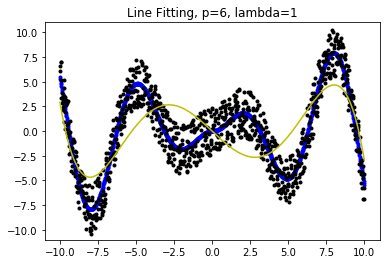

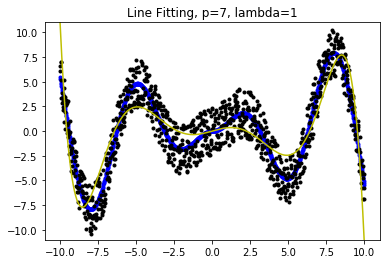

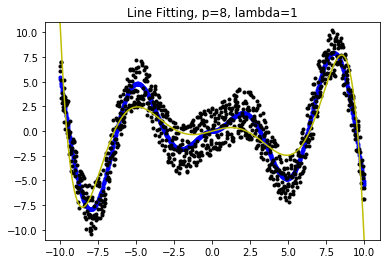

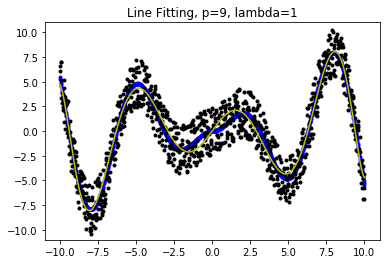

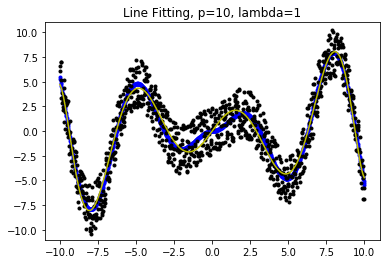

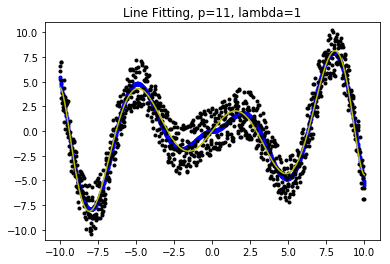

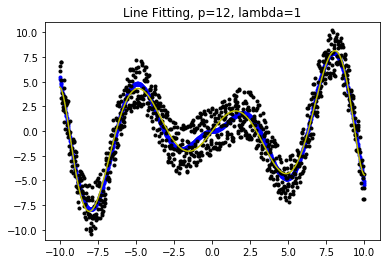

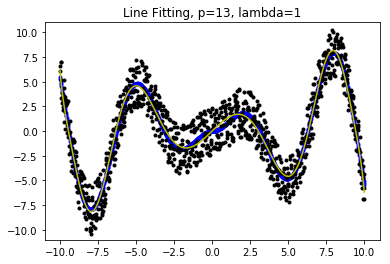

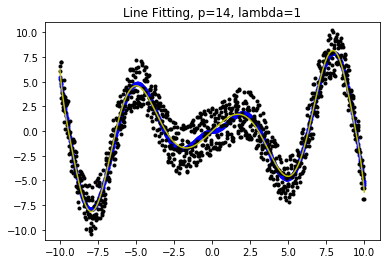

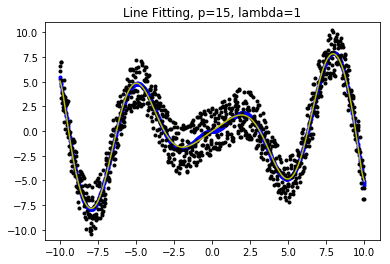

In [4]:
ratio = 1

for i in range(p_start,p_start+p_num): #6~15
    A = defA(i,x)
    A = appendA(np.asarray(A),i+1,ratio)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),i+1)

    theta = (A.T * A).I*A.T*B.T
    theta = np.asarray(theta)
    
    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    resi_y[i-p_start] = getResidual(approx,y1)+withRegularization(ratio,theta)
    plt.plot(x, y1, 'b.', x, y2, 'k.', x, approx, 'y')
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting, p="+str(i)+", lambda="+str(ratio))
    plt.show()

# Plot the polynomial curves with varying Lambda

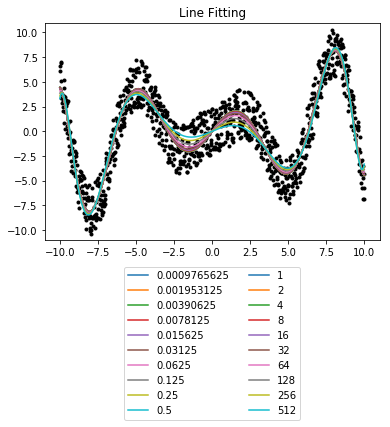

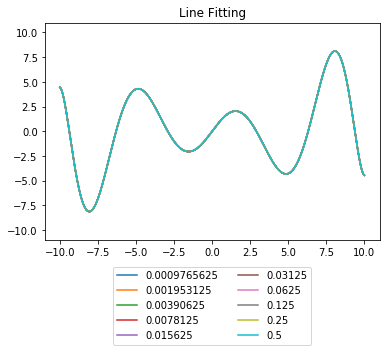

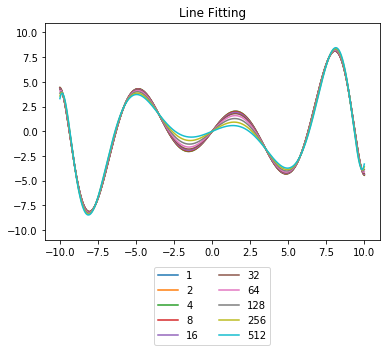

In [5]:
test_p = 12
test_len = 10
energy = np.zeros((test_len*2))
plt.plot(x, y2, 'k.')


for i in range(test_len*2): #0.125~8
    ratio = 2**(i-int(test_len))
    A = defA(test_p,x)
    A = appendA(np.asarray(A),test_p+1,ratio)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),test_p+1)

    theta = np.dot(np.linalg.pinv(A),B.T)
    theta = np.asarray(theta)
    

    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    energy[i] = getResidual(approx,y1)+withRegularization(ratio,theta)
    plt.plot(x, approx, label = str(ratio))
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
for i in range(test_len): #0.125~8
    ratio = 2**(i-10)
    A = defA(test_p,x)
    A = appendA(np.asarray(A),test_p+1,ratio)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),test_p+1)

    theta = np.dot(np.linalg.pinv(A),B.T)
    theta = np.asarray(theta)
    

    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    plt.plot(x, approx, label = str(ratio))
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
for i in range(test_len): #0.125~8
    ratio = 2**i
    A = defA(test_p,x)
    A = appendA(np.asarray(A),test_p+1,ratio)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),test_p+1)

    theta = np.dot(np.linalg.pinv(A),B.T)
    theta = np.asarray(theta)
    

    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    plt.plot(x, approx, label = str(ratio))
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# Plot Error with Varying Lambda

As we stored errors in ```energy```.

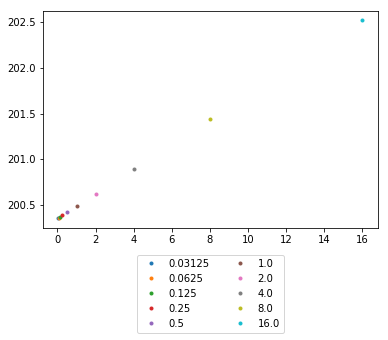

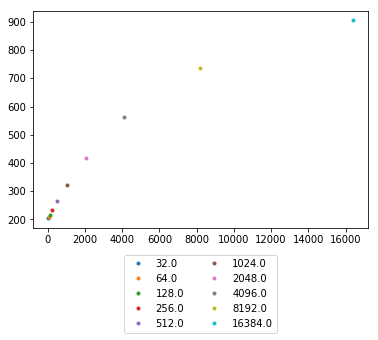

In [6]:
for i in range(test_len):
    ratio = 2**i/(2**int(test_len/2))
    plt.plot(ratio,energy[i],".",label = str(ratio))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
for i in range(test_len,test_len*2):
    ratio = 2**i/(2**int(test_len/2))
    plt.plot(ratio,energy[i],".",label = str(ratio))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()